## Correlaciones

La correlación es una medida de relación entre dos variables aleatorias. Normalmente se usa la correlación para identificar si existe una relación lineal entre dos variables. 

Importantísimo: que exista una correlación entre dos variables, no significa que la relación entre las variables sea verdadera. Existen casos donde dos variables pueden tener un alto nivel de correlación, pero se sabe de antemano, que su relación es meramente una casualidad. 

A estas correlaciones causales se les llama correlaciones espurias. Puede visitar el siguiente enlace para ver algunas muy divertidas.

https://www.tylervigen.com/spurious-correlations  

### Coeficiente de Correlación de Pearson

Esta metrica de correlación es probablemente la mas popular y se le llama "coeficiente de correlación". Se obtiene como el ratio (proporción) de la covarianza de X,Y dividido por el producto de sus desviaciones estandard.

Fórmula:

$$corr(X,Y)=\frac{cov(X,Y)}{\sigma_X\sigma_Y}$$

Donde: 

$$cov(X,Y)= \frac{\sum{(X-\mu_X)(Y-\mu_Y)}}{N}$$

Recordemos que un un valor cernano a 1 indica correlación, un valor cernano a 0 indica lo contrario.

La **covarianza** es un valor que indica el grado de variación conjunta de dos variables aleatorias respecto a sus medias

La correlacion de Pearson entre X & y es de: 0.9863478492663268


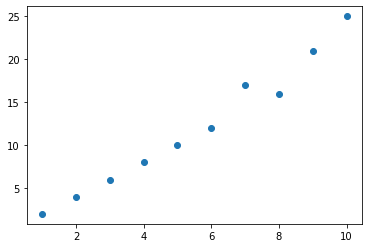

In [2]:
import numpy as np


# calculo de la desviacion standard de un arreglo d
def std(d):
    return np.std(d)

# calculo de la media de un arreglo d
def mean(d):
    return np.mean(d)

# calculo de la covarianza
def cov(x,y):
    return np.dot(x-mean(x),y-mean(y)) / len(x)

# estimacion del coeficiente de correlacion
def corr(x,y):
    return cov(x,y) / (std(x)*std(y))

X = np.array([1,2,3,4,5,6,7,8,9,10])
y = np.array([2,4,6,8,10,12,17,16,21,25])

print("La correlacion de Pearson entre X & y es de:", corr(X,y))


plt.scatter(X,y)
plt.show()


### Coeficiente de Correlación con Numpy

In [3]:
print("La correlacion de Pearson entre X & y es de:", np.corrcoef(X,y))

La correlacion de Pearson entre X & y es de: [[1.         0.98634785]
 [0.98634785 1.        ]]


### Cuando El Coeficiente de Pearson no Funciona

corr(X,Y) hace un excelente trabajo para identificar si existe una relación lineal entre dos variables, pero no identifica con certeza otro tipo de relaciones no-lineales. 

<img crossorigin="anonymous" src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/1024px-Correlation_examples2.svg.png" class="svg" width="980" height="448">

### Matriz de Correlaciones de un Pandas DataFrame

Vamos a explorar las correlaciones en el dataset la diabetes de la primera semana

- age age in years
- sex
- bmi body mass index
- bp average blood pressure
- s1 tc, T-Cells (a type of white blood cells)
- s2 ldl, low-density lipoproteins
- s3 hdl, high-density lipoproteins
- s4 tch, thyroid stimulating hormone
- s5 ltg, lamotrigine
- s6 glu, blood sugar level

Y: es el progreso de la enfermedad un anno despues de la captura de datos.

In [4]:
from sklearn import datasets

X,y = datasets.load_diabetes(return_X_y = True, as_frame=True)
X["y"] = y

corr = X.corr()

# Desplegar la matriz de correlaciones con pandas
corr.style.background_gradient(cmap='plasma').set_precision(2)

# https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,y
age,1.00,0.17,0.19,0.34,0.26,0.22,-0.08,0.20,0.27,0.30,0.19
sex,0.17,1.00,0.09,0.24,0.04,0.14,-0.38,0.33,0.15,0.21,0.04
bmi,0.19,0.09,1.00,0.40,0.25,0.26,-0.37,0.41,0.45,0.39,0.59
bp,0.34,0.24,0.40,1.00,0.24,0.19,-0.18,0.26,0.39,0.39,0.44
s1,0.26,0.04,0.25,0.24,1.00,0.90,0.05,0.54,0.52,0.33,0.21
s2,0.22,0.14,0.26,0.19,0.90,1.00,-0.20,0.66,0.32,0.29,0.17
s3,-0.08,-0.38,-0.37,-0.18,0.05,-0.20,1.00,-0.74,-0.40,-0.27,-0.39
s4,0.20,0.33,0.41,0.26,0.54,0.66,-0.74,1.00,0.62,0.42,0.43
s5,0.27,0.15,0.45,0.39,0.52,0.32,-0.40,0.62,1.00,0.46,0.57
s6,0.30,0.21,0.39,0.39,0.33,0.29,-0.27,0.42,0.46,1.00,0.38


In [5]:
## correlacion de todas las variables contra y
corr = X.corr()
corr["y"].sort_values(ascending=False)

y      1.000000
bmi    0.586450
s5     0.565883
bp     0.441484
s4     0.430453
s6     0.382483
s1     0.212022
age    0.187889
s2     0.174054
sex    0.043062
s3    -0.394789
Name: y, dtype: float64